<img src="https://i.postimg.cc/7H7zcX2c/CIMA-LOGO.png?dl=1\" alt="Texto alternativo" width="100" height="100">

# CIMA - Primer avance

**Jeferson Enrique Chalas Montes** Estadística Informática - UNALM

[**GitHub**](https://github.com/booimjeF)

# 1. Exploración de datos


Contexto de los database:

**Database n°1 (df1)**: Un conjunto de datos que describe las ventas de pizza de una pizzería. Hay 32 pizzas diferentes que se dividen en 4 categorías diferentes.

**Database n°2 (df2)**: Este conjunto de datos sintéticos proporciona información detallada sobre los pacientes con cáncer de pulmón, que abarca los atributos demográficos, el historial médico, los detalles del tratamiento y los resultados de supervivencia.

**Database n°3 (df3)**: Reseñas de la aplicación Spotify Music por parte de los usuarios en Google Play Store. También incluye información sobre las calificaciones y la fecha de las reseñas.

Para el proceso de exploración de datos seguiremos los siguientes pasos a continuación:

## Módulos y submódulos a usar:

In [35]:
import pandas as pd
import seaborn as sns
import numpy as np
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

## 1.1 Carga de datos:
Para esta parte usaremos la librería pandas y asignaremos una variable a cada archivo de datos.

In [36]:
# Cargar los archivos CSV en variables df1, df2, df3, df4
df1 = pd.read_csv('A_year_of_pizza_sales_from_a_pizza_place_872_68.csv') #Database de ventas de pizza
df2 = pd.read_csv('pulmon_cancer_data.csv') #Database sobre pacientes con cáncer de pulmón
df3 = pd.read_csv('spotify_reviews.csv') #Database de reviews a la aplicación de spotify

## 1.2 Limpieza y tratamiento de datos:
Para la limpieza y tratamiento de datos, tendremos que observar cada df.

In [37]:
print(df1)

       Unnamed: 0      X           id        date      time         name size  \
0               1      1  2015-000001  2015-01-01  11:38:36     hawaiian    M   
1               2      2  2015-000002  2015-01-01  11:57:40  classic_dlx    M   
2               3      3  2015-000002  2015-01-01  11:57:40     mexicana    M   
3               4      4  2015-000002  2015-01-01  11:57:40     thai_ckn    L   
4               5      5  2015-000002  2015-01-01  11:57:40  five_cheese    L   
...           ...    ...          ...         ...       ...          ...  ...   
49569       49570  49570  2015-021348  2015-12-31  21:23:10  four_cheese    L   
49570       49571  49571  2015-021348  2015-12-31  21:23:10   napolitana    S   
49571       49572  49572  2015-021348  2015-12-31  21:23:10  ckn_alfredo    M   
49572       49573  49573  2015-021349  2015-12-31  22:09:54     mexicana    L   
49573       49574  49574  2015-021350  2015-12-31  23:02:05      bbq_ckn    S   

          type  price  
0  

Las columnas "Unnamed" junto a la de "X" sólo indican una indexación por lo que tendremos que quitar estas

In [38]:
# Eliminar las columnas "Unnamed: 0" y "X" del DataFrame df1
df1.drop(columns=['Unnamed: 0', 'X'], inplace=True)

Ya que las columnas "date" y "time" son datos de tipo fecha tendremos que establecer ese formato a los datos respectivos

In [39]:
# Convertir la columna 'date' a tipo datetime
df1['date'] = pd.to_datetime(df1['date'])

# Convertir la columna 'time' a tipo datetime especificando el formato
df1['time'] = pd.to_datetime(df1['time'], format='%H:%M:%S')

# Verificar los primeros registros para asegurarnos que la conversión fue correcta
print(df1.head())

            id       date                time         name size     type  \
0  2015-000001 2015-01-01 1900-01-01 11:38:36     hawaiian    M  classic   
1  2015-000002 2015-01-01 1900-01-01 11:57:40  classic_dlx    M  classic   
2  2015-000002 2015-01-01 1900-01-01 11:57:40     mexicana    M   veggie   
3  2015-000002 2015-01-01 1900-01-01 11:57:40     thai_ckn    L  chicken   
4  2015-000002 2015-01-01 1900-01-01 11:57:40  five_cheese    L   veggie   

   price  
0  13.25  
1  16.00  
2  16.00  
3  20.75  
4  18.50  


In [40]:
print(df2)

         Patient_ID  Age  Gender Smoking_History  Tumor_Size_mm  \
0       Patient0000   68    Male  Current Smoker      81.678677   
1       Patient0001   58    Male    Never Smoked      78.448272   
2       Patient0002   44    Male   Former Smoker      67.714305   
3       Patient0003   72    Male  Current Smoker      70.806008   
4       Patient0004   37  Female    Never Smoked      87.272433   
...             ...  ...     ...             ...            ...   
23653  Patient23653   45    Male   Former Smoker      91.279410   
23654  Patient23654   31    Male  Current Smoker      45.139048   
23655  Patient23655   74    Male   Former Smoker      89.640323   
23656  Patient23656   47  Female   Former Smoker      45.770358   
23657  Patient23657   64    Male   Former Smoker      13.460912   

      Tumor_Location      Stage          Treatment  Survival_Months  \
0         Lower Lobe  Stage III            Surgery               44   
1         Lower Lobe    Stage I  Radiation Therapy   

En este caso volvemos a encontrarnos con una columna irrelevante que sería "Patient_ID"

In [41]:
df2.drop(columns=['Patient_ID'], inplace=True)
print(df2.head())

   Age  Gender Smoking_History  Tumor_Size_mm Tumor_Location      Stage  \
0   68    Male  Current Smoker      81.678677     Lower Lobe  Stage III   
1   58    Male    Never Smoked      78.448272     Lower Lobe    Stage I   
2   44    Male   Former Smoker      67.714305     Lower Lobe    Stage I   
3   72    Male  Current Smoker      70.806008     Lower Lobe  Stage III   
4   37  Female    Never Smoked      87.272433     Lower Lobe   Stage IV   

           Treatment  Survival_Months         Ethnicity Insurance_Type  ...  \
0            Surgery               44          Hispanic       Medicare  ...   
1  Radiation Therapy              101         Caucasian        Private  ...   
2       Chemotherapy               69  African American          Other  ...   
3       Chemotherapy               95  African American       Medicare  ...   
4  Radiation Therapy              105             Asian       Medicaid  ...   

  Alanine_Aminotransferase_Level Aspartate_Aminotransferase_Level  \
0    

In [42]:
print(df3)

                                   reviewId                      userName  \
0      437314fe-1b1d-4352-abea-12fec30fce58                     Rajib Das   
1      4933ad2c-c70a-4a84-957d-d405439b2e0f         Mihaela Claudia Neagu   
2      1ab275fb-59bf-42c7-88ef-b85901f0445e               JONATHAN GRACIA   
3      b38406eb-7b11-4ceb-a45c-d7f28fb5d382                    Cam Rempel   
4      7be7999d-4cb6-47b9-8414-d7bdaa9df578  Your clowness (Her Clowness)   
...                                     ...                           ...   
84160  b41ccea7-2805-458a-bd70-547ff07ddb95                 Marlena Scott   
84161  456cbd4f-d9b5-4d7b-8a7d-caab7593431e                 A Google user   
84162  33317821-01e1-4207-964f-ae8109a0d6b3                Supriya Deepak   
84163  98acdcd9-a1e8-4d49-9fc8-1aee84d14383                 A Google user   
84164  4263fcac-7aac-464c-b007-a7a25797b9df                  lewis matley   

                                                 content  score  \
0       

Para df3 la columna "reviewId", "userName" y "at" son irrelevantes

In [43]:
df3.drop(columns=['reviewId','userName','at'], inplace=True)
print(df3.head())

                                             content  score  thumbsUpCount  \
0                                          It's good      4              0   
1  I love this app so much, I've been using Spoti...      5              0   
2                                            Perfect      5              0   
3  Best all around music streaming app I have use...      5              0   
4  Are y'all fr gatekeeping the play button on so...      1              0   

  reviewCreatedVersion  appVersion  
0                  NaN         NaN  
1           8.9.38.494  8.9.38.494  
2           8.9.36.616  8.9.36.616  
3           8.9.38.494  8.9.38.494  
4           8.9.38.494  8.9.38.494  


Observando la columna "reviewCreatedVersion" y "appVersion" se sospecha que se puede tratar de 2 columnas con la misma información

Aquí lo comprobamos:

In [44]:
# Mostrar el número de valores faltantes en 'reviewCreatedVersion' y 'appVersion'
print("Valores faltantes en reviewCreatedVersion:", df3['reviewCreatedVersion'].isna().sum())
print("Valores faltantes en appVersion:", df3['appVersion'].isna().sum())

Valores faltantes en reviewCreatedVersion: 5768
Valores faltantes en appVersion: 5768


In [45]:
# Eliminar filas con valores faltantes en 'reviewCreatedVersion' y 'appVersion' en df3
df3.dropna(subset=['reviewCreatedVersion', 'appVersion'], inplace=True)
print(df3.head())

                                             content  score  thumbsUpCount  \
1  I love this app so much, I've been using Spoti...      5              0   
2                                            Perfect      5              0   
3  Best all around music streaming app I have use...      5              0   
4  Are y'all fr gatekeeping the play button on so...      1              0   
5                                           Loved it      5              0   

  reviewCreatedVersion  appVersion  
1           8.9.38.494  8.9.38.494  
2           8.9.36.616  8.9.36.616  
3           8.9.38.494  8.9.38.494  
4           8.9.38.494  8.9.38.494  
5           8.9.38.494  8.9.38.494  


In [46]:
#Podemos observar que ambas columnas tienen valores iguales, por lo que las comparamos para eliminar a una de estas
df3['reviewCreatedVersion'].equals(df3['appVersion'])

True

Probamos que son iguales y por consiguiente podemos eliminar una de ellas

In [47]:
# Eliminar la columna 'reviewCreatedVersion' de df3
df3.drop(columns=['reviewCreatedVersion'], inplace=True)
print(df3.head())

                                             content  score  thumbsUpCount  \
1  I love this app so much, I've been using Spoti...      5              0   
2                                            Perfect      5              0   
3  Best all around music streaming app I have use...      5              0   
4  Are y'all fr gatekeeping the play button on so...      1              0   
5                                           Loved it      5              0   

   appVersion  
1  8.9.38.494  
2  8.9.36.616  
3  8.9.38.494  
4  8.9.38.494  
5  8.9.38.494  


Ahora nos aseguramos de que no estemos olvidando algún valor perdido en algún database

In [48]:
# Contar los valores perdidos en df1, df2 y df3
print("Valores perdidos en df1, df2 y df3")
print(df1.isna().sum(), "\n")
print(df2.isna().sum(), "\n")
print(df3.isna().sum())


Valores perdidos en df1, df2 y df3
id       0
date     0
time     0
name     0
size     0
type     0
price    0
dtype: int64 

Age                                 0
Gender                              0
Smoking_History                     0
Tumor_Size_mm                       0
Tumor_Location                      0
Stage                               0
Treatment                           0
Survival_Months                     0
Ethnicity                           0
Insurance_Type                      0
Family_History                      0
Comorbidity_Diabetes                0
Comorbidity_Hypertension            0
Comorbidity_Heart_Disease           0
Comorbidity_Chronic_Lung_Disease    0
Comorbidity_Kidney_Disease          0
Comorbidity_Autoimmune_Disease      0
Comorbidity_Other                   0
Performance_Status                  0
Blood_Pressure_Systolic             0
Blood_Pressure_Diastolic            0
Blood_Pressure_Pulse                0
Hemoglobin_Level                    0

## 1.3 Exploración de datos
Para la exploración de datos tendremos un resumen usando describe()

In [49]:
# Realizar un análisis básico de los datos y calcular estadísticas descriptivas
print("Estadísticas descriptivas para df1:")
print(df1.describe(), "\n")

print("Estadísticas descriptivas para df2:")
print(df2.describe(), "\n")

print("Estadísticas descriptivas para df3:")
print(df3.describe())


Estadísticas descriptivas para df1:
                                date                           time  \
count                          49574                          49574   
mean   2015-06-29 12:23:49.136240896  1900-01-01 16:23:20.555855872   
min              2015-01-01 00:00:00            1900-01-01 09:52:21   
25%              2015-03-31 00:00:00            1900-01-01 13:23:41   
50%              2015-06-28 00:00:00            1900-01-01 16:30:39   
75%              2015-09-28 00:00:00  1900-01-01 18:54:02.750000128   
max              2015-12-31 00:00:00            1900-01-01 23:05:52   
std                              NaN                            NaN   

              price  
count  49574.000000  
mean      16.497762  
min        9.750000  
25%       12.750000  
50%       16.500000  
75%       20.250000  
max       35.950000  
std        3.621954   

Estadísticas descriptivas para df2:
                Age  Tumor_Size_mm  Survival_Months  Performance_Status  \
count  23658.

## 1.4 Visualización de datos


Comenzando con df1:

Tenemos la gráfica de las ventas realizadas según el tipo de pizza:

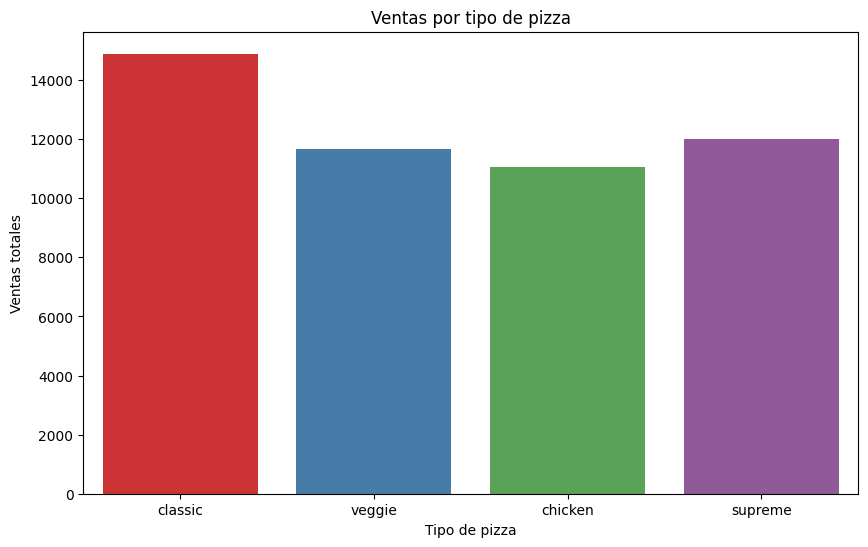

In [50]:
plt.figure(figsize=(10, 6))
sns.countplot(x='type', hue='type', data=df1, palette='Set1', legend=False)
plt.title('Ventas por tipo de pizza')
plt.xlabel('Tipo de pizza')
plt.ylabel('Ventas totales')
plt.show()

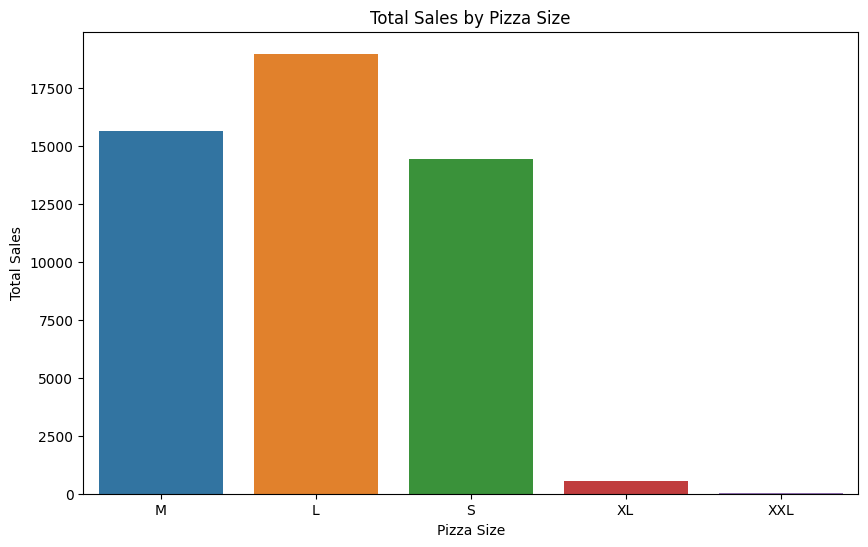

In [51]:
plt.figure(figsize=(10, 6))
sns.countplot(x='size', hue='size', data=df1, legend=False)
plt.title('Total Sales by Pizza Size')
plt.xlabel('Pizza Size')
plt.ylabel('Total Sales')
plt.show()

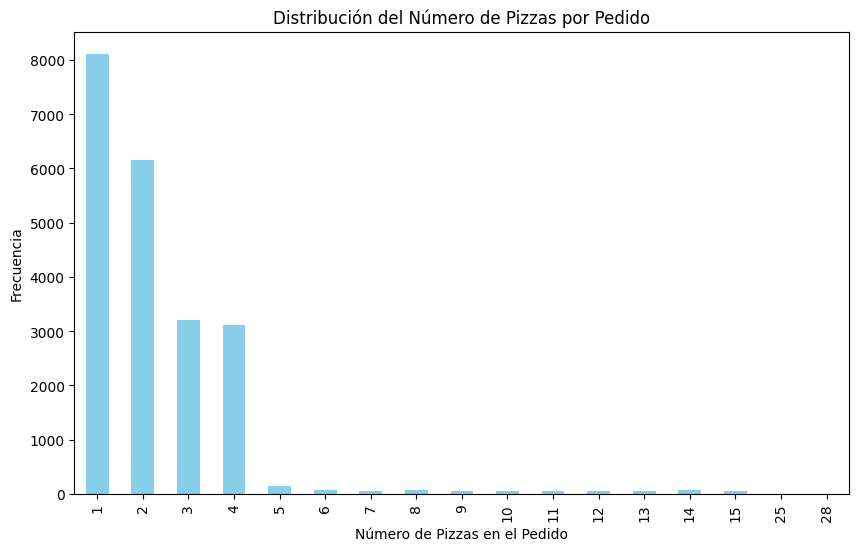

In [52]:
# Contar el número de pizzas por pedido (usando la columna 'id' como referencia)
pizza_count = df1['id'].value_counts()

# Crear un gráfico de barras para visualizar la distribución del número de pizzas por pedido
plt.figure(figsize=(10, 6))
pizza_count.value_counts().sort_index().plot(kind='bar', color='skyblue')

# Agregar título y etiquetas de los ejes
plt.title('Distribución del Número de Pizzas por Pedido')
plt.xlabel('Número de Pizzas en el Pedido')
plt.ylabel('Frecuencia')

plt.show()

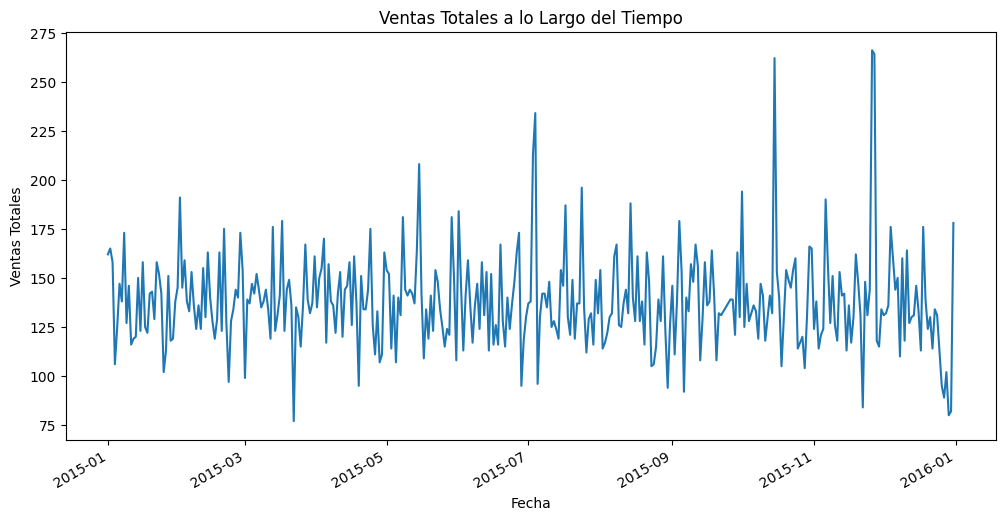

In [53]:
plt.figure(figsize=(12, 6))

# Agrupar por fecha y contar el número de pedidos (id únicos) por día
ventas_a_lo_largo_del_tiempo = df1.groupby('date')['id'].count()

# Graficar la serie temporal de ventas totales
ventas_a_lo_largo_del_tiempo.plot()

# Añadir título y etiquetas de los ejes
plt.title('Ventas Totales a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Ventas Totales')

# Mostrar el gráfico
plt.show()


Siguiendo con df2

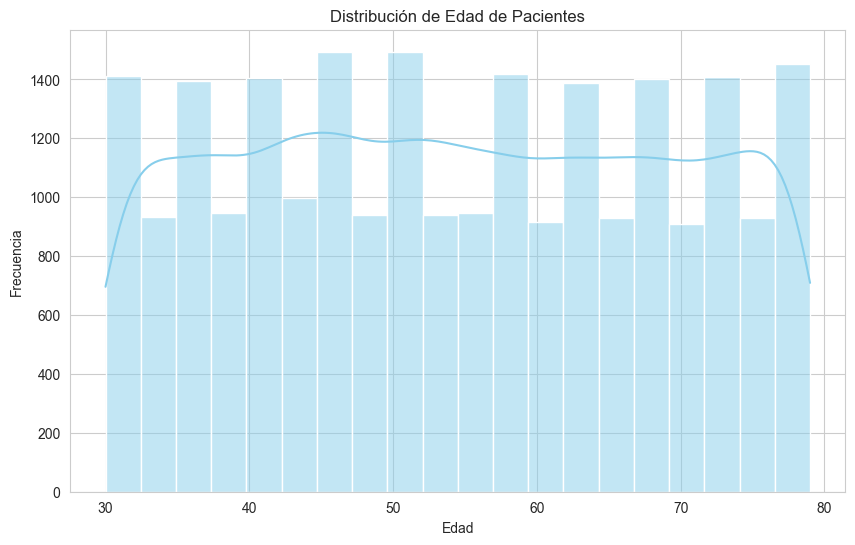

In [54]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Crear el histograma de la columna "Age"
sns.histplot(df2['Age'], bins=20, kde=True, color='skyblue')

# Agregar título y etiquetas de los ejes
plt.title('Distribución de Edad de Pacientes')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

plt.show()

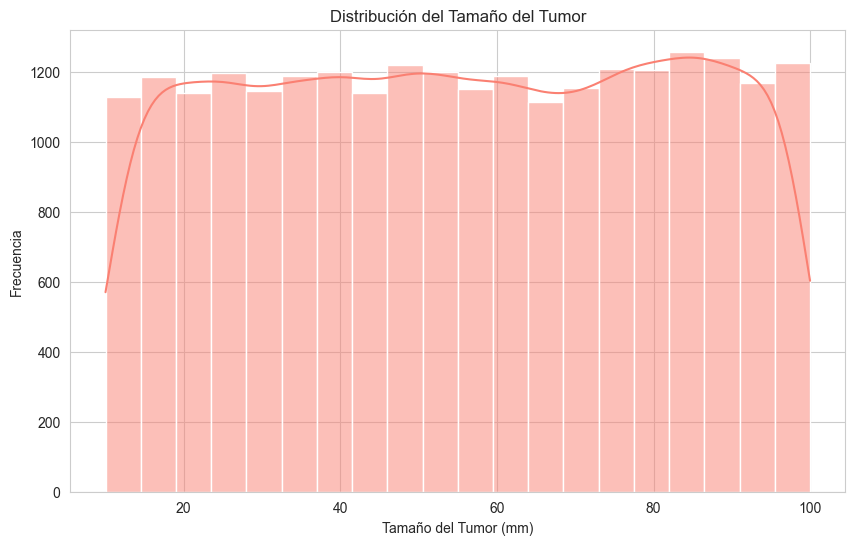

In [55]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Crear el histograma de la columna "Tumor_Size_mm"
sns.histplot(df2['Tumor_Size_mm'], bins=20, kde=True, color='salmon')

# Agregar título y etiquetas de los ejes
plt.title('Distribución del Tamaño del Tumor')
plt.xlabel('Tamaño del Tumor (mm)')
plt.ylabel('Frecuencia')

plt.show()

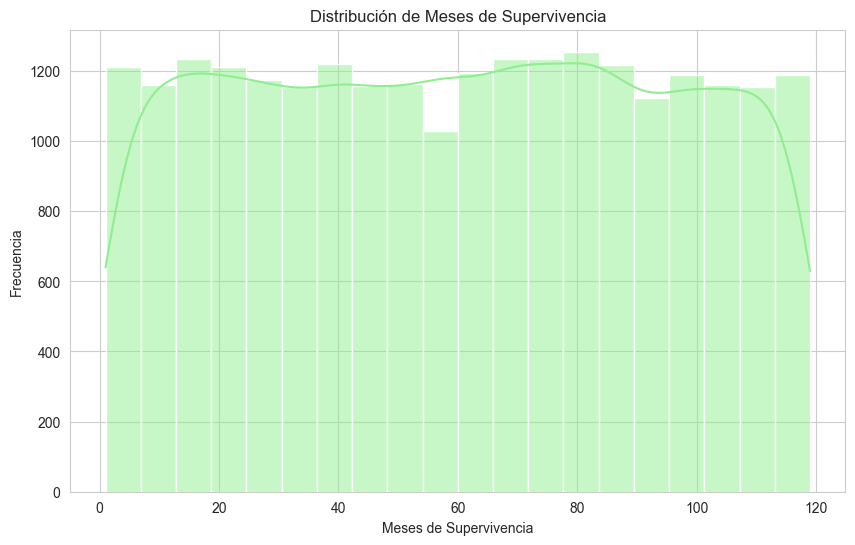

In [56]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Crear el histograma de la columna "Survival_Months"
sns.histplot(df2['Survival_Months'], bins=20, kde=True, color='lightgreen')

# Agregar título y etiquetas de los ejes
plt.title('Distribución de Meses de Supervivencia')
plt.xlabel('Meses de Supervivencia')
plt.ylabel('Frecuencia')

plt.show()

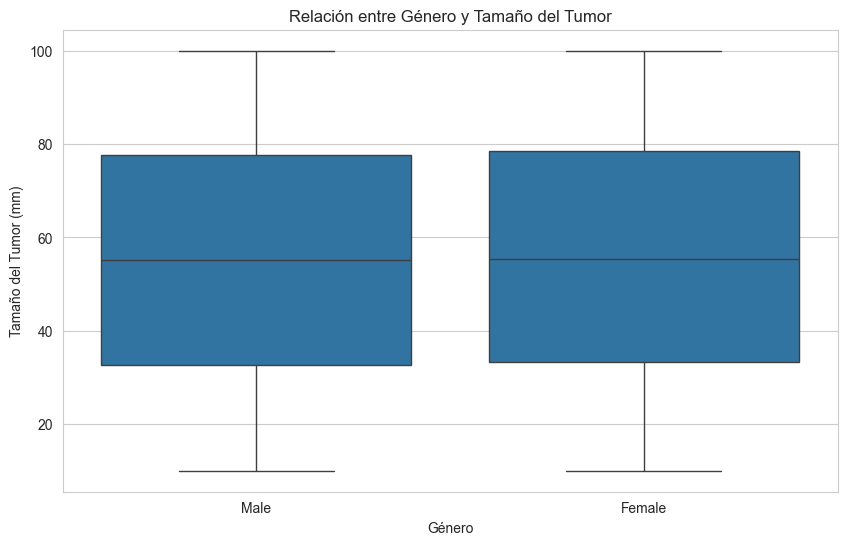

In [57]:
# Crear un boxplot para visualizar la relación entre el género y el tamaño del tumor
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Tumor_Size_mm', data=df2)

plt.title('Relación entre Género y Tamaño del Tumor')
plt.xlabel('Género')
plt.ylabel('Tamaño del Tumor (mm)')

plt.show()

In [58]:
df2['Gender'].value_counts()

Gender
Male      11924
Female    11734
Name: count, dtype: int64

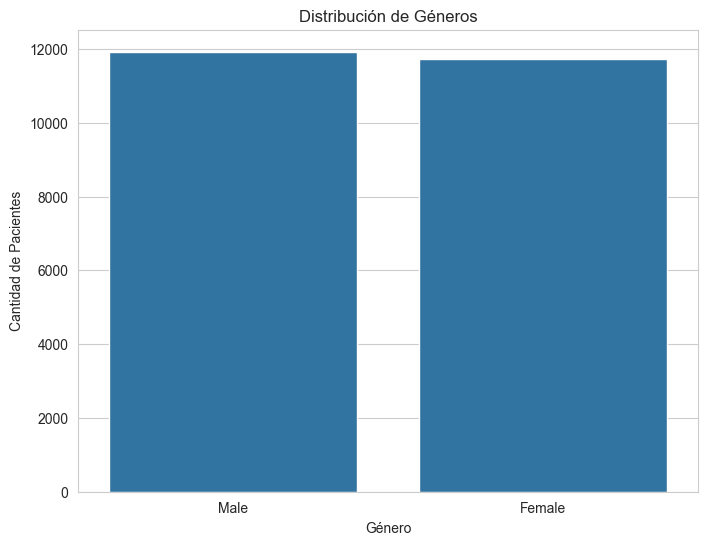

In [59]:
# Crear un gráfico de barras para mostrar la distribución de géneros
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=df2)
plt.title('Distribución de Géneros')
plt.xlabel('Género')
plt.ylabel('Cantidad de Pacientes')
plt.show()

Tomando df3

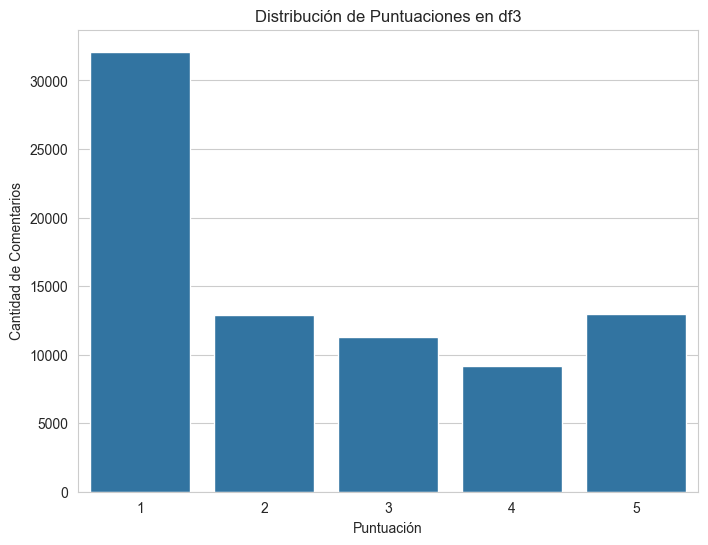

In [60]:
# Crear un gráfico de barras para mostrar la distribución de puntuaciones en df3
plt.figure(figsize=(8, 6))
sns.countplot(x='score', data=df3)
plt.title('Distribución de Puntuaciones en df3')
plt.xlabel('Puntuación')
plt.ylabel('Cantidad de Comentarios')
plt.show()

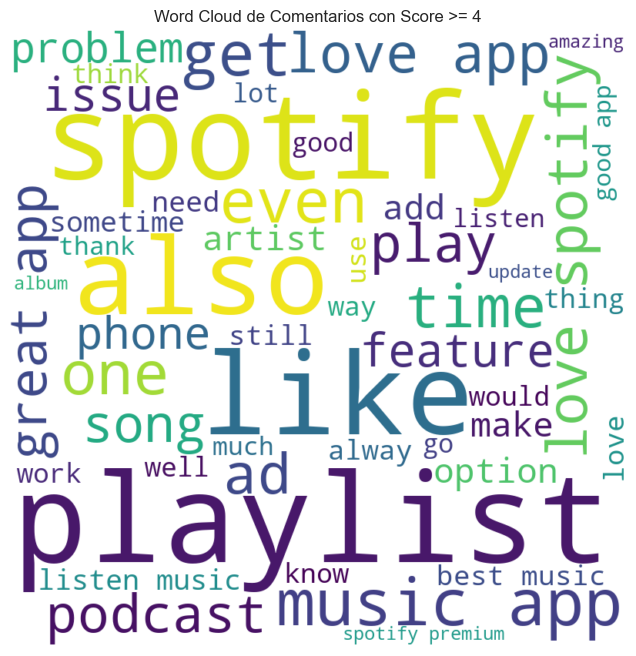

In [61]:
# Descargar los stopwords de NLTK si no están ya descargados
#import nltk
#nltk.download('stopwords')
#nltk.download('punkt')

# Obtener los stopwords en inglés
stop_words = set(stopwords.words('english'))

# Filtrar las reseñas con puntuación mayor o igual a 4
df3_good_reviews = df3[df3['score'] >= 4].copy()

# Crear una cadena vacía para almacenar todas las palabras preprocesadas
pos_words = ""

# Iterar sobre cada valor en la columna "content" de df3_good_reviews
for val in df3_good_reviews["content"]:
    val = str(val)  # Asegurarse de que el valor es una cadena de texto
    tokens = word_tokenize(val)  # Tokenizar el texto
    tokens = [word.lower() for word in tokens if word.isalpha()]  # Filtrar palabras no alfabéticas y convertir a minúsculas
    tokens = [word for word in tokens if word not in stop_words]  # Eliminar stopwords
    pos_words += " ".join(tokens) + " "  # Unir los tokens y añadirlos a la cadena pos_words

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      stopwords=stop_words,
                      max_words=50,
                      min_font_size=10).generate(pos_words)

# Visualizar la nube de palabras
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud de Comentarios con Score >= 4')
plt.axis("off")
plt.show()


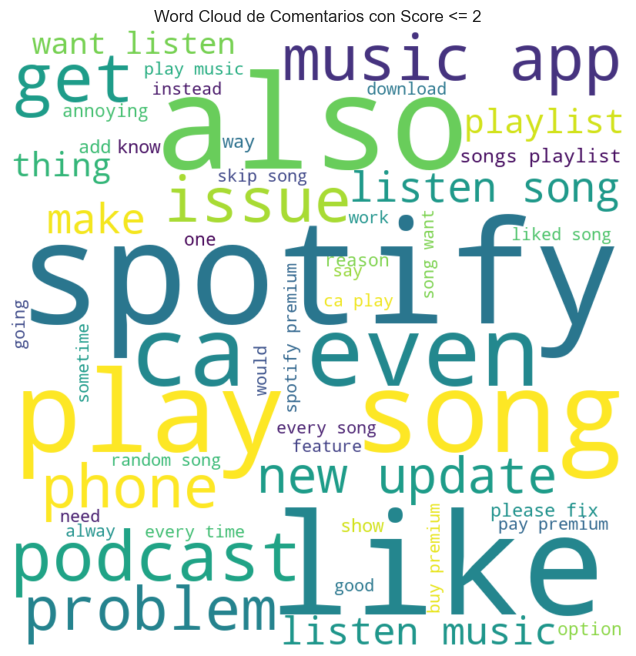

In [62]:
import pandas as pd
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

# Descargar los stopwords de NLTK si no están ya descargados
#import nltk
#nltk.download('stopwords')
#nltk.download('punkt')

# Obtener los stopwords en inglés
stop_words = set(stopwords.words('english'))

# Filtrar las reseñas con puntuación menor o igual a 2
df3_bad_reviews = df3[df3['score'] <= 2].copy()

# Crear una cadena vacía para almacenar todas las palabras preprocesadas
bad_words = ""

# Iterar sobre cada valor en la columna "content" de df3_bad_reviews
for val in df3_bad_reviews["content"]:
    val = str(val)  # Asegurarse de que el valor es una cadena de texto
    tokens = word_tokenize(val)  # Tokenizar el texto
    tokens = [word.lower() for word in tokens if word.isalpha()]  # Filtrar palabras no alfabéticas y convertir a minúsculas
    tokens = [word for word in tokens if word not in stop_words]  # Eliminar stopwords
    bad_words += " ".join(tokens) + " "  # Unir los tokens y añadirlos a la cadena bad_words

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      stopwords=stop_words,
                      max_words=50,
                      min_font_size=10).generate(bad_words)

# Visualizar la nube de palabras
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud de Comentarios con Score <= 2')
plt.axis("off")
plt.show()


# 2. Pre procesamiento

## 2.1 Feature Engineering
Aplicando a df1

In [63]:
# Combinar 'date' y 'time' en una nueva columna 'datetime'
df1['datetime'] = df1['date'] + pd.to_timedelta(df1['time'].dt.hour, unit='h') + pd.to_timedelta(df1['time'].dt.minute, unit='m')

# Nuevas características a partir de 'datetime'
df1['day_of_week'] = df1['datetime'].dt.dayofweek
df1['month'] = df1['datetime'].dt.month
df1['hour'] = df1['datetime'].dt.hour

print(df1.head())

            id       date                time         name size     type  \
0  2015-000001 2015-01-01 1900-01-01 11:38:36     hawaiian    M  classic   
1  2015-000002 2015-01-01 1900-01-01 11:57:40  classic_dlx    M  classic   
2  2015-000002 2015-01-01 1900-01-01 11:57:40     mexicana    M   veggie   
3  2015-000002 2015-01-01 1900-01-01 11:57:40     thai_ckn    L  chicken   
4  2015-000002 2015-01-01 1900-01-01 11:57:40  five_cheese    L   veggie   

   price            datetime  day_of_week  month  hour  
0  13.25 2015-01-01 11:38:00            3      1    11  
1  16.00 2015-01-01 11:57:00            3      1    11  
2  16.00 2015-01-01 11:57:00            3      1    11  
3  20.75 2015-01-01 11:57:00            3      1    11  
4  18.50 2015-01-01 11:57:00            3      1    11  


In [64]:
customer_total_spent = df1.groupby('id')['price'].sum()
customer_average_order = df1.groupby('id')['price'].mean()

print("Total gastado por cliente:")
print(customer_total_spent)

print("\nOrden promedio por cliente:")
print(customer_average_order)

Total gastado por cliente:
id
2015-000001    13.25
2015-000002    92.00
2015-000003    37.25
2015-000004    16.50
2015-000005    16.50
               ...  
2015-021346    62.25
2015-021347    66.50
2015-021348    46.70
2015-021349    20.25
2015-021350    12.75
Name: price, Length: 21350, dtype: float64

Orden promedio por cliente:
id
2015-000001    13.250000
2015-000002    18.400000
2015-000003    18.625000
2015-000004    16.500000
2015-000005    16.500000
                 ...    
2015-021346    15.562500
2015-021347    16.625000
2015-021348    15.566667
2015-021349    20.250000
2015-021350    12.750000
Name: price, Length: 21350, dtype: float64


In [65]:
df1_encoded = pd.get_dummies(df1, columns=['size'])
print(df1_encoded)

                id       date                time         name     type  \
0      2015-000001 2015-01-01 1900-01-01 11:38:36     hawaiian  classic   
1      2015-000002 2015-01-01 1900-01-01 11:57:40  classic_dlx  classic   
2      2015-000002 2015-01-01 1900-01-01 11:57:40     mexicana   veggie   
3      2015-000002 2015-01-01 1900-01-01 11:57:40     thai_ckn  chicken   
4      2015-000002 2015-01-01 1900-01-01 11:57:40  five_cheese   veggie   
...            ...        ...                 ...          ...      ...   
49569  2015-021348 2015-12-31 1900-01-01 21:23:10  four_cheese   veggie   
49570  2015-021348 2015-12-31 1900-01-01 21:23:10   napolitana  classic   
49571  2015-021348 2015-12-31 1900-01-01 21:23:10  ckn_alfredo  chicken   
49572  2015-021349 2015-12-31 1900-01-01 22:09:54     mexicana   veggie   
49573  2015-021350 2015-12-31 1900-01-01 23:02:05      bbq_ckn  chicken   

       price            datetime  day_of_week  month  hour  size_L  size_M  \
0      13.25 2015-01-

Aplicado a df2

In [66]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df2['Gender_LabelEncoded'] = le.fit_transform(df2['Gender'])

print(df2.head())

   Age  Gender Smoking_History  Tumor_Size_mm Tumor_Location      Stage  \
0   68    Male  Current Smoker      81.678677     Lower Lobe  Stage III   
1   58    Male    Never Smoked      78.448272     Lower Lobe    Stage I   
2   44    Male   Former Smoker      67.714305     Lower Lobe    Stage I   
3   72    Male  Current Smoker      70.806008     Lower Lobe  Stage III   
4   37  Female    Never Smoked      87.272433     Lower Lobe   Stage IV   

           Treatment  Survival_Months         Ethnicity Insurance_Type  ...  \
0            Surgery               44          Hispanic       Medicare  ...   
1  Radiation Therapy              101         Caucasian        Private  ...   
2       Chemotherapy               69  African American          Other  ...   
3       Chemotherapy               95  African American       Medicare  ...   
4  Radiation Therapy              105             Asian       Medicaid  ...   

  Aspartate_Aminotransferase_Level Creatinine_Level   LDH_Level Calcium_Le

In [67]:
# Aplicar One-Hot Encoding a la columna 'Stage'
df2_encoded = pd.get_dummies(df2, columns=['Stage'], prefix='Stage')
print(df2_encoded.head())

   Age  Gender Smoking_History  Tumor_Size_mm Tumor_Location  \
0   68    Male  Current Smoker      81.678677     Lower Lobe   
1   58    Male    Never Smoked      78.448272     Lower Lobe   
2   44    Male   Former Smoker      67.714305     Lower Lobe   
3   72    Male  Current Smoker      70.806008     Lower Lobe   
4   37  Female    Never Smoked      87.272433     Lower Lobe   

           Treatment  Survival_Months         Ethnicity Insurance_Type  \
0            Surgery               44          Hispanic       Medicare   
1  Radiation Therapy              101         Caucasian        Private   
2       Chemotherapy               69  African American          Other   
3       Chemotherapy               95  African American       Medicare   
4  Radiation Therapy              105             Asian       Medicaid   

  Family_History  ... Phosphorus_Level Glucose_Level Potassium_Level  \
0             No  ...         3.547734    113.919243        4.968163   
1            Yes  ...     